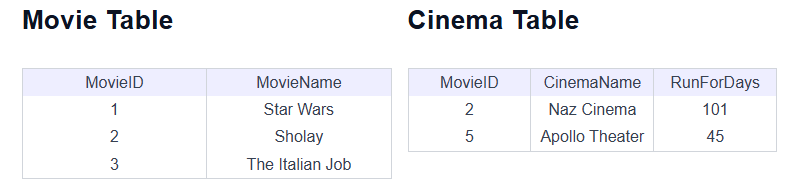

The ANSI SQL standard defines five types of joins:
1. Cross Join (Cartesian Product)
2. Inner Join
3. Left Outer Join
4. Right Outer Join
5. Full Outer Join

> Self Join

# Cross Join (Cartesian Product) - Join without condition

* **Cross Join** or **Cartesian Product** creates a result set that includes every possible combination of rows from the `Movie` table and the `Cinema` table.
*  It pairs each record from the `Movie` table with every record in the `Cinema` table.

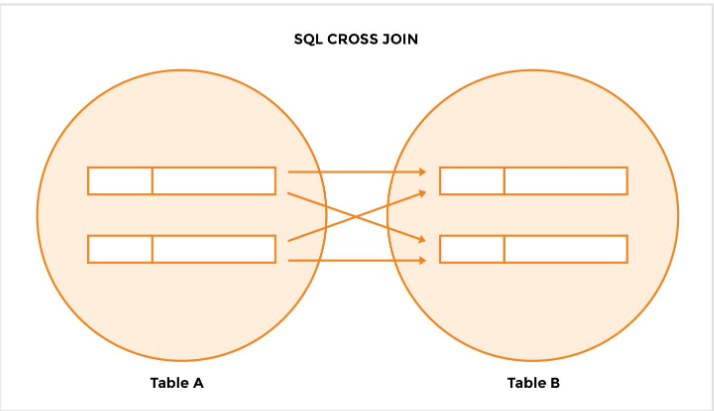

```mysql
SELECT * FROM Movie, Cinema;
```

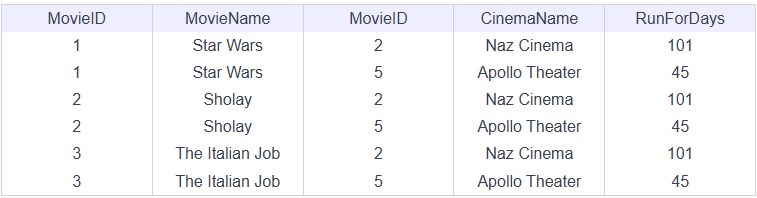



# Inner Join

SQL offers two distinct methods for **Inner Join**.
* One method utilizes the standard `WHERE` clause, as demonstrated earlier.
* The other method employs the `JOIN` keyword for this purpose.

There’s no difference in using the `WHERE` clause or the `INNER JOIN` clause in query performance, rather it is just a matter of taste.

The approach without the `JOIN` keyword may seem simpler initially but becomes intricate as queries grow in complexity. Conversely, the `JOIN` keyword method is more structured and easier to comprehend, particularly in complicated scenarios.

In case of an inner join, a condition or multiple conditions are tested to determine if a row from Table A should be joined with a row from Table B. This condition is called the **join predicate**.

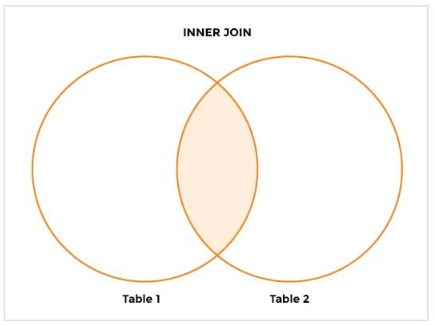

```mysql

-- USING WHERE KEYWORD
SELECT *
FROM Movie m, Cinema c 
WHERE m.MovieID = c.MovieID;

-- USING JOIN KEYWORD
SELECT *
FROM Movie m
INNER JOIN Cinema c ON m.MovieID = c.MovieID;

SELECT * FROM Actors a INNER JOIN Actors b USING(FirstName);
```

> Remember, the **`USING`** clause defines one or more columns that are in both tables or results and used to join or match rows. Furthermore, if any rows from the two tables don’t match, they aren’t included in the output.

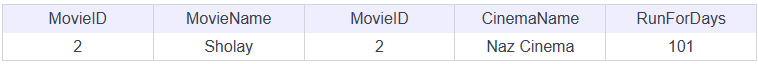

* Since the `MovieID` has been used in both these tables, `SELECT *` retrieves a result set where the same information involving the `MovieID` is displayed twice. 
* It can be handled by explicitly naming all the columns to be displayed in the result set, using the common column only once in the list.

```mysql
SELECT
    m.MovieID,
    m.MovieName,
    c.CinemaName,
    c.RunForDays
FROM Movie m
INNER JOIN Cinema c ON m.MovieID = c.MovieID;
```

SQL provides a mechanism to automatically handle it using **NATURAL JOIN**.

The `INNER` keyword in **“`INNER JOIN`”** is optional, as the default behavior of the `JOIN` clause is considered as an `INNER JOIN` if no other type of join (such as `LEFT JOIN` or `RIGHT JOIN`) is specified.

```mysql
SELECT
    m.MovieID,
    m.MovieName,
    c.CinemaName,
    c.RunForDays
FROM Movie m
JOIN Cinema c ON m.MovieID = c.MovieID;
```

> **NOTE**:
> * In general, a `JOIN` can employ any relational operator in the condition.
> * However, in most cases, the joining condition entails an **equality comparison operator ('=')**.
> * A `JOIN` where the equality comparison operator `=` is used to match rows between tables based on identical values in specified columns is known as `EQUI JOIN`.


# Natural Join

* A `NATURAL JOIN` in SQL is a type of join that automatically matches columns with the same name in the participating tables and avoids duplicate column names in the result. 
* The `NATURAL JOIN` performs an inner join of the participating tables, essentially without the user having to specify the matching columns.

```mysql
SELECT *
FROM Movie m
NATURAL JOIN Cinema c ON m.MovieID = c.MovieID;
```

> *Note that if none of the columns in the two tables share the same name, the result will be a **Cartesian product***.

**Under the hood, a natural join query is translated into an inner join query with matching column names ending up inside the using clause.**

```mysql
SELECT
    m.MovieID,
    m.MovieName,
    c.CinemaName,
    c.RunForDays
FROM Movie m
INNER JOIN Cinema c ON m.MovieID = c.MovieID;

SELECT
    m.MovieID,
    m.MovieName,
    c.CinemaName,
    c.RunForDays
FROM Movie m
INNER JOIN Cinema c USING (MovieID)
```

**We can also ask for natural left and right joins.**

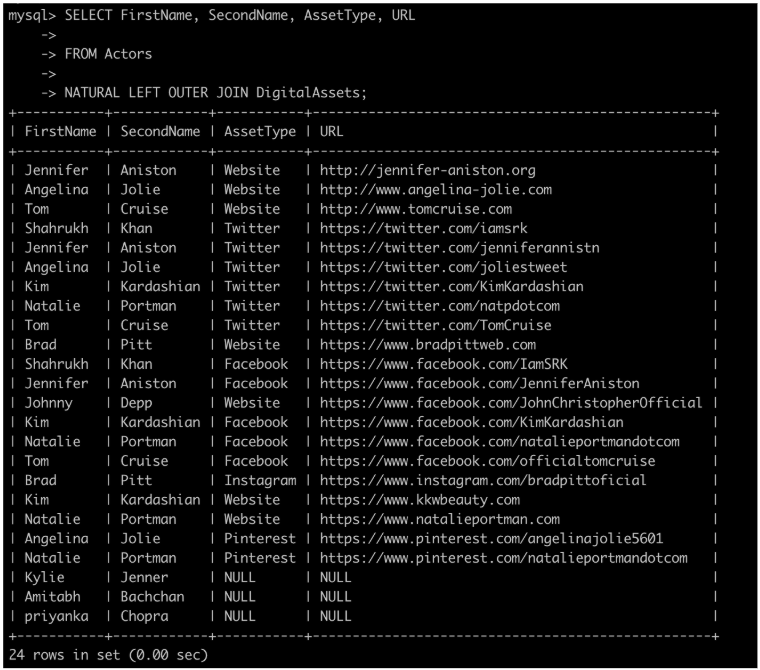

* From the output you can see there’s nothing magical about the natural join, it’s just syntactic sugar that implicitly finds the columns to join the tables.
* Ideally, we should write expressive queries and avoid using the natural join as it hides the columns that’ll be used for the join and can subtly introduce bugs.
* Imagine a situation where a table is altered to have an additional column that has the same name as a column in another table which is naturally joined with the first table in an existing query.
* Suddenly, the results from the natural join query will stop to make sense.


# Left Join (aka. Left Outer Join)

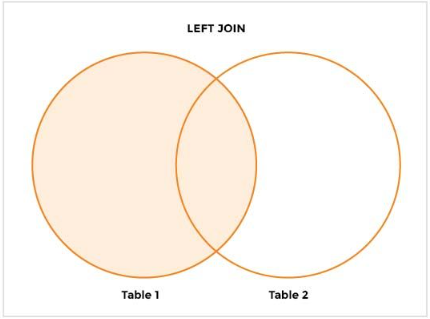

In the case of a left join, the result set consists of 
* **rows that match the join predicate**, and
* also rows from the table specified on the left of the left join clause that don’t match the join predicate. 
* `Null` is inserted for columns of Table 2, for the rows of Table 1 that didn't have a matching row in Table 2 as per the join predicate. 

That is, **all rows from the left table (Table 1) are always included in the result set**.
* Rows from the right table (Table 2) are only included if they match the join predicate.
* Otherwise, `Null` is inserted for the columns of the right table (Table 2).

```mysql
SELECT *
FROM Movie m
LEFT JOIN Cinema c ON m.MovieID = c.MovieID;
```
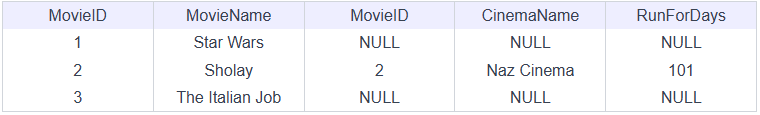

> ***An alternative syntax for left and right joins is `LEFT OUTER JOIN` and `RIGHT OUTER JOIN` respectively, though there’s no difference in functionality if you skip the `OUTER` keyword***.

# Right Join (aka. Right Outer Join)

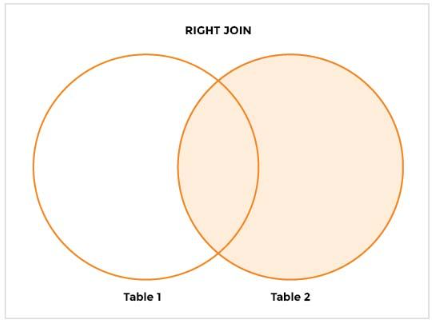

The right join is the reverse of the left join. In this case, all rows from the right table are always included in the result set, and only those rows from the left table make it to the result set that satisfy the join condition.

In the case of a right join, the result set consists of 
* **rows that match the join predicate**, and
* also rows from the table specified on the right of the right join clause that don’t match the join predicate. 
* `Null` is inserted for columns of Table 1, for the rows of Table 2 that didn't have a matching row in Table 1 as per the join predicate. 

That is, **all rows from the right table (Table 2) are always included in the result set**.
* Rows from the left table (Table 1) are only included if they match the join predicate.
* Otherwise, `Null` is inserted for the columns of the left table (Table 1).

> ***With left and outer joins, we specify which side of the join is allowed to have a row in the result when the join predicate isn’t satisfied.***


```mysql
SELECT *
FROM Movie m
RIGHT JOIN Cinema c ON m.MovieID = c.MovieID;
```

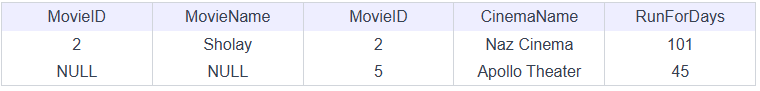

> ***An alternative syntax for left and right joins is `LEFT OUTER JOIN` and `RIGHT OUTER JOIN` respectively, though there’s no difference in functionality if you skip the `OUTER` keyword***.

# Full Join (aka. Full Outer Join)

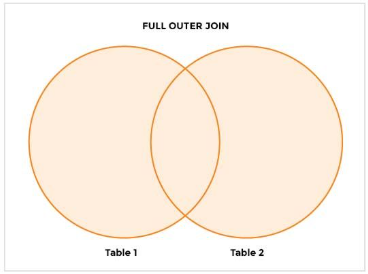

* In the case of a full join, rows from both tables are included in the result set. 
* Rows that evaluate true for the join predicate are only included once.
* Rows that don’t match the predicate have NULL inserted for columns belonging to the other table.

> **Note that MySQL doesn’t support a full join.**

> ***An alternative syntax for left and right joins is `LEFT OUTER JOIN` and `RIGHT OUTER JOIN` respectively, though there’s no difference in functionality if you skip the `OUTER` keyword***.

**ANSI SQL**
```sql
SELECT *
FROM Movie m
FULL OUTER JOIN Cinema c ON m.MovieID = c.MovieID;
```

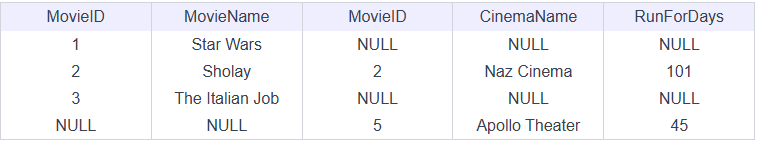

# Self Join

A self join is the result set when a table is joined to itself. 

If we create a self join of the movie table based on the movie iD the result will be as follows:

```mysql
SELECT *
FROM Movie m1, Movie m2 
WHERE m1.MovieID = m2.MovieID;
```

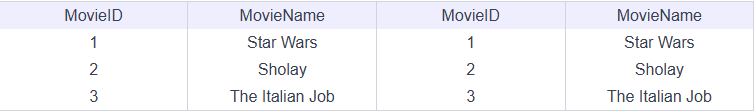

**Cartesian Product Using Inner Join without Join Predicate/Condition**

```mysql
SELECT * FROM Actors a INNER JOIN Actors b;
```

We can use the `USING` clause to specify the column to join the two tables on.

```mysql
SELECT * FROM Actors a INNER JOIN Actors b USING(FirstName);
```

> Remember, the **`USING`** clause defines one or more columns that are in both tables or results and used to join or match rows. Furthermore, if any rows from the two tables don’t match, they aren’t included in the output.

# Union & Union ALL

* The **UNION** clause allows us to combine the results from several queries together. 
* The clause doesn’t join the table but merely combines the rows of two query results together.

1. **A realistic example would be a query where you are required to print the top two richest actors and the least two richest.**

```mysql
(SELECT CONCAT(FirstName, ' ', SecondName) AS "Actor Name" 
FROM Actors 
ORDER BY NetworthInMillions DESC 
LIMIT 2)

UNION

(SELECT CONCAT(FirstName, ' ', SecondName) AS "ThisAliasIsIgnored" 
FROM Actors 
ORDER BY NetworthInMillions ASC 
LIMIT 2);
```

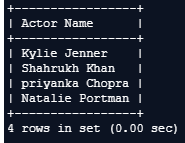

> Note we have used the various techniques learned so far to enhance the above query. We use the `concat` function to join first and second names with a space separating them and use the alias **“Actor Name”** for the resulting column. The alias from the second query is ignored. Furthermore, we wrap the two queries in parentheses which is a requirement when using the `order by` or `limit` clause in subqueries of a `union` query.

2. **When using the `UNION` clause, the two result sets being combined should have the same number and order of columns. The columns from the result set should be of the same type or types that are compatible. For instance, the following query will error out:**

```mysql
SELECT FirstName, Id FROM Actors 
UNION 
SELECT FirstName FROM Actors;
```
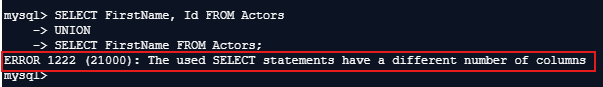

To make the above query work, we can insert a **fake column** or **null** as follows:

```mysql
SELECT FirstName, Id FROM Actors 
UNION 
SELECT FirstName, null FROM Actors;
```
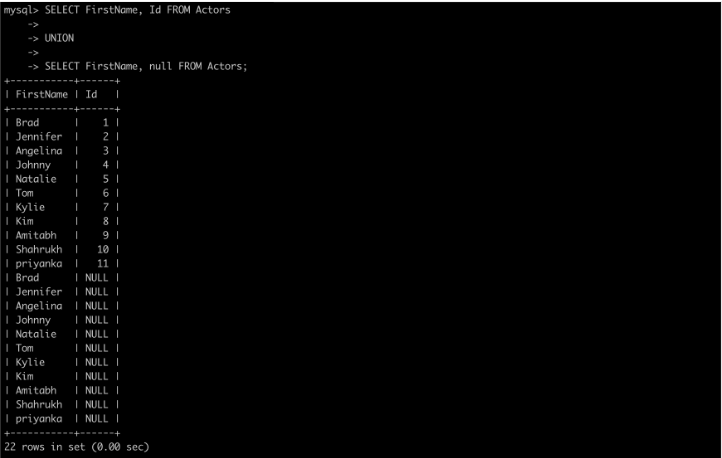

3. **Observe the output of the following query:**

```mysql

SELECT MaritalStatus FROM Actors 
UNION 
SELECT Gender FROM Actors;
```

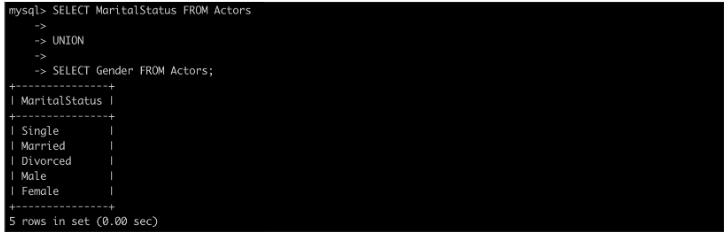

> Note that the union clause doesn’t output duplicate values and works similarly to the distinct clause. If we want duplicate values to be included in the query result, we need to use the **`UNION ALL`** clause as follows:   

```mysql
SELECT MaritalStatus FROM Actors 
UNION ALL
SELECT Gender FROM Actors;
```

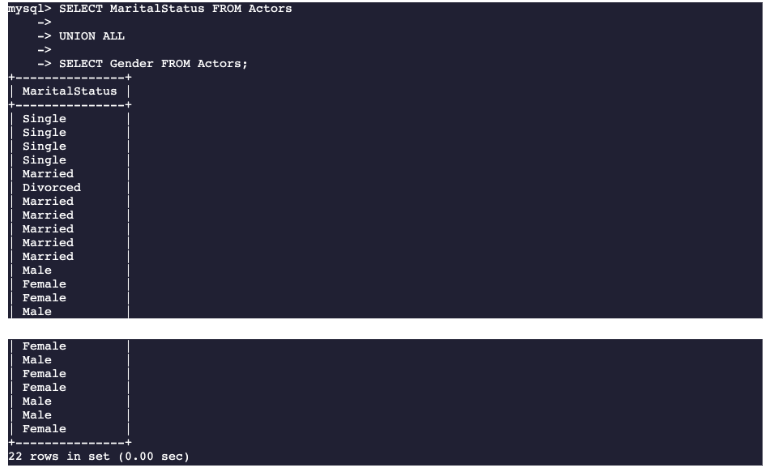

5. **Another quirk of the `UNION` clause is that it may ignore the `ORDER BY` clause when used without the `LIMIT` clause in a subquery. Consider the below query:**

```mysql
(SELECT CONCAT(FirstName, ' ', SecondName) AS "Actor Name"  
FROM Actors  
ORDER BY NetworthInMillions DESC  LIMIT 2)  

UNION  

(SELECT NetworthInMillions 
FROM Actors 
ORDER BY NetworthInMillions ASC);
```

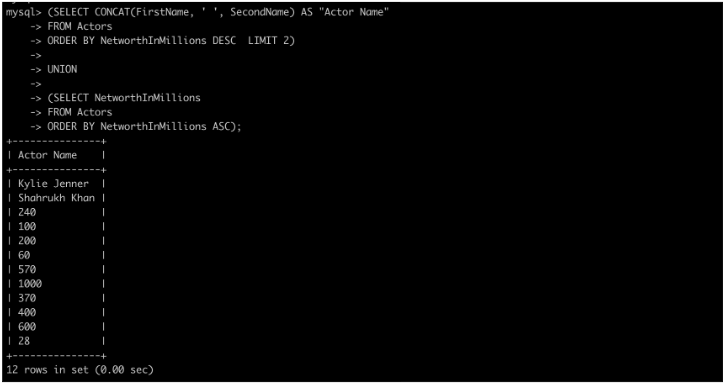

> Note that in the second subquery, we order the rows in an ascending fashion by the column `NetworthInMillions`. The values in the result set are, however, printed disregarding the order. When we tack on a **`LIMIT`** clause to the second subquery the `ID`s show up in descending order as shown below:

```mysql
(SELECT CONCAT(FirstName, ' ', SecondName) AS "Actor Name"  
FROM Actors  
ORDER BY NetworthInMillions DESC  LIMIT 2)  

UNION  

(SELECT NetworthInMillions 
FROM Actors 
ORDER BY NetworthInMillions ASC LIMIT 3);
```

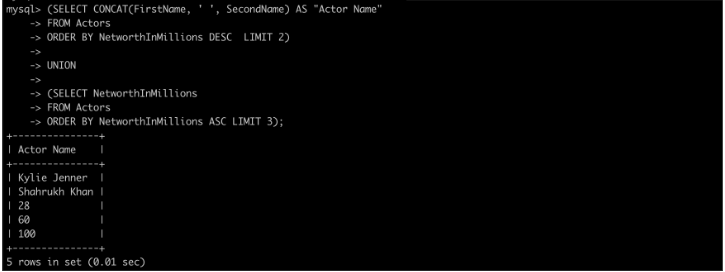

> Also, notice that the types of the two columns in the result set aren’t the same. The query works because MySQL converts the int to **varchar**.